<a href="https://colab.research.google.com/github/skyMei-J/Spark/blob/main/%EF%BC%ADask_Training_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%env SPARK_DRIVER_MEMORY=4g

env: SPARK_DRIVER_MEMORY=4g


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

! java -version 2>&1 | awk -F[\"_] 'NR==1{print $2}'

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode
openjdk version "1.8.0_292"
OpenJDK Runtime Environment (build 1.8.0_292-8u292-b10-0ubuntu1~18.04-b10)
OpenJDK 64-Bit Server VM (build 25.292-b10, mixed mode)
1.8.0


In [ ]:
%tensorflow_version 1.x
!pip3 uninstall kapre
!pip3 install tensorflow==1.15
!pip3 install analytics-zoo 
!pip3 install numpy==1.18.5

TensorFlow 1.x selected.
Uninstalling kapre-0.3.5:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/kapre-0.3.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/kapre/*
Proceed (y/n)? y
  Successfully uninstalled kapre-0.3.5
     |████████████████████████████████| 412.3MB 28kB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=062018d3125383ef0c48a47d0ac367382ab6bd8f4e72fdf77fa9185ec1955a92
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Found existing installation: tensorflow 1.15.2
    Uninstalling tensorflow-1.15.2:
      Successfully uninstalled tensorflow-1.15.2
     |████████████████████████████████| 158.9MB 59kB/s 
     |████████████████████████████████| 114.1MB 99kB/s 
     |████████████████████████████████| 215.6MB 69kB/s 
     |█████

In [ ]:

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper librariesf
import numpy as np
import matplotlib.pyplot as plt

# You MUST use tensorflow 1.15
print(tf.__version__)

1.15.0


In [ ]:
from PIL import Image, ImageOps
import numpy as np
from os import listdir
from os.path import isfile, isdir, join

In [ ]:
# Please store your Mask data in the Mask_path="/content/drive/MyDrive/dataset/Mask"
# Please store your No_Mask data in No_mask_path = "/content/drive/MyDrive/dataset/No_mask"
Mask_path = "/content/drive/MyDrive/dataset/Mask"
files = listdir(Mask_path)
fullpath = join(Mask_path, files[0])
image = Image.open(fullpath) 
np_arr1 = np.array(image)
width=28
height=28
train_data = np.empty((0,width,height), int)
Mask_len = len(files)
print("Number of data of No_mask:",len(files))
for f in files:

  fullpath = join(Mask_path, f)
  image = Image.open(fullpath)   # image is a PIL image 
  gray = ImageOps.grayscale(image)
  np_arr2 = gray.resize((28,28))
  np_arr3 = np.array(np_arr2)  
  np_arr4 = np.expand_dims(np_arr3, axis=0)
  train_data = np.append(train_data,np_arr4,axis=0)


print("Mask array shape:",train_data.shape)
  

Number of data of No_mask: 113
Mask array shape: (113, 28, 28)


In [ ]:
No_mask_path = "/content/drive/MyDrive/dataset/No_mask"
files = listdir(No_mask_path)
fullpath = join(No_mask_path, files[0])
image = Image.open(fullpath) 
np_arr1 = np.array(image)
print("Number of data of Mask:",len(files))
for f in files:

  fullpath = join(No_mask_path, f)
  image = Image.open(fullpath)   # image is a PIL image 
  gray = ImageOps.grayscale(image)
  np_arr2 = gray.resize((28,28))
  np_arr3 = np.array(np_arr2)  
  np_arr4 = np.expand_dims(np_arr3, axis=0)
  train_data = np.append(train_data,np_arr4,axis=0)
print("No_mask array shape:",train_data.shape)


Number of data of Mask: 130
No_mask array shape: (243, 28, 28)


In [ ]:
import random
My_list = [*range(0, train_data.shape[0], 1)]#0~242
random.seed('foobar')
Seq = random.sample(My_list,len(My_list))
print("Generate",len(Seq) ," Random Sample")
train_images = np.empty((0,width,height), int)
label = []
count=0
for s in Seq:
  temp = np.expand_dims(train_data[s], axis=0)
  train_images = np.append(train_images,temp,axis=0)
  if s<Mask_len:
    label.append(1)#Mask
  else:
    label.append(0)#No Mask
  #print(s,count,label[count])
  count+=1
  
train_labels = np.array(label)
print("data array shape:",train_images.shape)
print("label array shape:",train_labels.shape)

Generate 243  Random Sample
data array shape: (243, 28, 28)
label array shape: (243,)


In [ ]:
class_names = ['No_Mask', 'Mask']

In [ ]:
train_images2 = train_images[:100]
train_labels2 = train_labels[:100]

In [ ]:
test_images = train_images[200:243]
train_images=train_images[0:200]
test_labels = train_labels[200:243]
train_labels = train_labels[0:200]
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)
print(type(test_labels))

(200, 28, 28)
(43, 28, 28)
(200,)
(43,)
<class 'numpy.ndarray'>


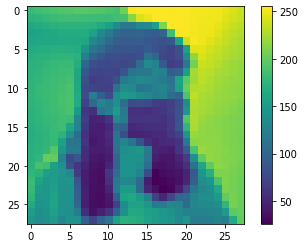

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
train_images2 = train_images2 / 255.0
test_images = test_images / 255.0

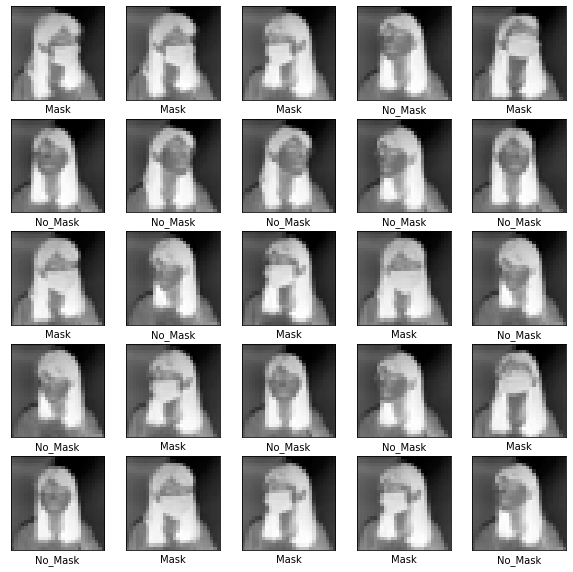

In [ ]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(width, height)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from zoo.tfpark import KerasModel, TFDataset
from zoo import init_nncontext
# set up enviroment
_ = init_nncontext()
# wrap model as tfpark model for distributted training, evaluation and prediction
model = KerasModel(model)

Prepending /usr/local/lib/python3.7/dist-packages/bigdl/share/conf/spark-bigdl.conf to sys.path
Adding /usr/local/lib/python3.7/dist-packages/zoo/share/lib/analytics-zoo-bigdl_0.12.2-spark_2.4.3-0.10.0-jar-with-dependencies.jar to BIGDL_JARS
Prepending /usr/local/lib/python3.7/dist-packages/zoo/share/conf/spark-analytics-zoo.conf to sys.path

pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.7/dist-packages/zoo/share/lib/analytics-zoo-bigdl_0.12.2-spark_2.4.3-0.10.0-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/lib/bigdl-0.12.2-jar-with-dependencies.jar pyspark-shell 


In [ ]:
MODEL_PATH = "/content/drive/MyDrive/dataset/model/model.pb"
dataset = TFDataset.from_ndarrays((train_images, train_labels),
                                 batch_size=160,
                                 val_tensors=(test_images, test_labels))
model.fit(dataset, epochs=100, batch_size=160)
model.save_model(MODEL_PATH)
print("Save model, Path:",MODEL_PATH)





creating: createTFParkSampleToMiniBatch
creating: createZooKerasSparseCategoricalCrossEntropy
creating: createLoss
creating: createZooKerasSparseCategoricalAccuracy
creating: createFakeOptimMethod
Instructions for updating:
Use `tf.cast` instead.

creating: createTFValidationMethod
creating: createTFValidationMethod





creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createTFParkSampleToMiniBatch
creating: createTFParkSampleToMiniBatch
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
INFO:tensorflow:Restoring parameters from /tmp/tmpg38e_5_4/model
Save model, Path: /content/drive/MyDrive/dataset/model/model.pb


In [ ]:
eval_dist = model.evaluate(test_images, test_labels, batch_per_thread=280, distributed=True)
print(eval_dist)
print('Test accuracy:', eval_dist['acc Top1Accuracy'])


creating: createZooKerasAccuracy
creating: createStatelessMetric
creating: createTFValidationMethod
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'TFNdarrayDataset' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'TFNdarrayDataset' object has no attribute 'name'
INFO:tensorflow:SavedModel written to: /tmp/tmpwmql0qxh/saved_model.pb
{'loss': 0.017256997525691986, '

In [ ]:
predictions = model.predict(test_images, batch_per_thread=280, distributed=True)

INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'TFNdarrayDataset' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'TFNdarrayDataset' object has no attribute 'name'
INFO:tensorflow:SavedModel written to: /tmp/tmp4_svpavr/saved_model.pb


In [ ]:
predictions[0]

array([0.00847316, 0.9915269 ], dtype=float32)

In [ ]:
np.argmax(predictions[0])

1

In [ ]:
test_labels[0]

1

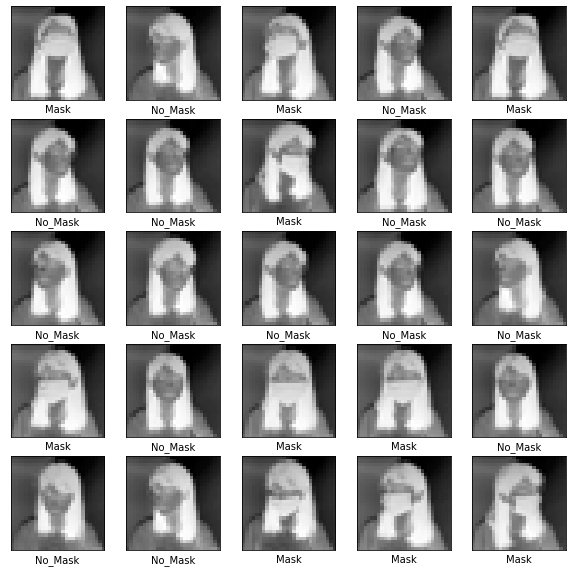

In [ ]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])])
plt.show()